In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DJS Compute/Task_1/listings_data.csv')

In [6]:
df.head(5)



,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [7]:
df.shape

(48895, 16)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            48895 non-null  int64  
 1   listing_name          48879 non-null  object 
 2   host_id               48895 non-null  int64  
 3   host_name             48874 non-null  object 
 4   borough               48895 non-null  object 
 5   area                  48895 non-null  object 
 6   latitude              48895 non-null  float64
 7   longitude             48895 non-null  float64
 8   room_type             48895 non-null  object 
 9   price (in dollars)    48895 non-null  int64  
 10  minimum_stay          48895 non-null  int64  
 11  no_of_reviews         48895 non-null  int64  
 12  last_review_date      38843 non-null  object 
 13  reviews_per_month     38843 non-null  float64
 14  host_listing_count    48895 non-null  int64  
 15  booking_availabilit

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape
df1=df.copy()

In [11]:
df1.loc[df1.duplicated(subset=['listing_name'])]

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,12-05-2011,0.02,28,60
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,27-06-2019,0.14,28,81
580,219818,✿✿✿ COUNTRY COTTAGE IN THE CITY✿✿✿,1138692,Keera (Jena),Manhattan,Lower East Side,40.71892,-73.98401,Entire home/apt,199,1,14,20-07-2015,0.15,2,158
661,250537,The Lenox in Harlem,1313306,Yvette,Manhattan,Harlem,40.81122,-73.94279,Entire home/apt,400,5,0,NaN,NaN,2,365
669,253471,Loft Suite @ The Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73641,-73.95330,Entire home/apt,199,3,24,06-11-2018,0.32,28,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48684,36382847,Comfort home,266211707,Yan,Brooklyn,Sunset Park,40.64439,-74.01816,Private room,185,1,0,NaN,NaN,2,177
48735,36412461,"Sunny, Cozy, Private Room In The Heart of Bush...",147515897,Flávia,Brooklyn,Bushwick,40.70366,-73.92728,Private room,84,3,0,NaN,NaN,1,28
48759,36420404,Home Sweet Home,273656890,Liana,Manhattan,East Harlem,40.79266,-73.94740,Private room,50,1,0,NaN,NaN,1,81
48791,36427922,Home away from home,238163900,Lucy,Queens,Cambria Heights,40.68557,-73.72731,Private room,50,3,0,NaN,NaN,1,176


In [12]:
df1.query('listing_name == "Superior @ Box House"')

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
321,77765,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73749,-73.95292,Private room,179,3,36,01-07-2019,0.36,28,79
339,84010,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73813,-73.95394,Private room,179,3,13,27-06-2019,0.14,28,81
682,253846,Superior @ Box House,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73731,-73.95450,Private room,179,3,4,04-12-2015,0.05,28,81


In [13]:
df1['last_review_date']= pd.to_datetime(df1['last_review_date'])

<ipython-input-13-709ee7abbbc3>:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['last_review_date']= pd.to_datetime(df1['last_review_date'])


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   listing_id            48895 non-null  int64         
 1   listing_name          48879 non-null  object        
 2   host_id               48895 non-null  int64         
 3   host_name             48874 non-null  object        
 4   borough               48895 non-null  object        
 5   area                  48895 non-null  object        
 6   latitude              48895 non-null  float64       
 7   longitude             48895 non-null  float64       
 8   room_type             48895 non-null  object        
 9   price (in dollars)    48895 non-null  int64         
 10  minimum_stay          48895 non-null  int64         
 11  no_of_reviews         48895 non-null  int64         
 12  last_review_date      38843 non-null  datetime64[ns]
 13  reviews_per_mont

In [15]:
dup=[]
df1.loc[df1.duplicated(subset=['listing_name'])]
for i in df1['listing_name']:
  if i not in dup:
    dup.append(i)

In [16]:
print(dup)


['Clean & quiet apt home by the park', 'Skylit Midtown Castle', 'THE VILLAGE OF HARLEM....NEW YORK !', 'Cozy Entire Floor of Brownstone', 'Entire Apt: Spacious Studio/Loft by central park', 'Large Cozy 1 BR Apartment In Midtown East', 'BlissArtsSpace!', "Large Furnished Room Near B'way ", 'Cozy Clean Guest Room - Family Apt', 'Cute & Cozy Lower East Side 1 bdrm', 'Beautiful 1br on Upper West Side', 'Central Manhattan/near Broadway', 'Lovely Room 1, Garden, Best Area, Legal rental', 'Wonderful Guest Bedroom in Manhattan for SINGLES', 'West Village Nest - Superhost', 'Only 2 stops to Manhattan studio', 'Perfect for Your Parents + Garden', 'Chelsea Perfect', 'Hip Historic Brownstone Apartment with Backyard', 'Huge 2 BR Upper East  Cental Park', 'Sweet and Spacious Brooklyn Loft', 'CBG CtyBGd HelpsHaiti rm#1:1-4', 'CBG Helps Haiti Room#2.5', 'CBG Helps Haiti Rm #2', 'MAISON DES SIRENES1,bohemian apartment', 'Sunny Bedroom Across Prospect Park', 'Magnifique Suite au N de Manhattan - vue Clo

In [17]:
# Step 1: Use value_counts() to get the counts of each listing_name
name_counts = df1['listing_name'].value_counts()

# Step 2: Filter to get only those names with a count greater than one
names_more_than_once = name_counts[name_counts > 1].index.tolist()

# names_more_than_once is now a list of listing_name entries that appear more than once
print(names_more_than_once)
print(len(names_more_than_once))

['Hillside Hotel', 'Home away from home', 'New york Multi-unit building', 'Brooklyn Apartment', 'Loft Suite @ The Box House Hotel', 'Private Room', '#NAME?', 'Artsy Private BR in Fort Greene Cumberland', 'Private room', 'Private room in Williamsburg', 'Cozy Brooklyn Apartment', 'Beautiful Brooklyn Brownstone', 'Private room in Brooklyn', 'Harlem Gem', 'New York Apartment', 'Private room in Manhattan', 'Cozy Room', 'IN MINT CONDITION-STUDIOS EAST 44TH/UNITED NATIONS', 'Bushwick Oasis', 'Cozy East Village Apartment', 'Home Away From Home', 'Home Sweet Home', 'West Village Apartment', 'Cozy home away from home', 'WEST VILLAGE Bohemian flat in neo-Tudor town house', 'Home', 'Cozy Private Room', 'Private Room in Brooklyn', 'Harlem Oasis', 'Room with a View', 'Cozy Apartment', 'Williamsburg Loft', 'A CLASSIC NYC NEIGHBORHOOD-EAST 86TH/5TH AVENUE', 'Room in the heart of Williamsburg', 'Upper West Side Studio', 'Private Room in Williamsburg', 'East Village Apartment', 'Sonder | The Biltmore | 

In [18]:
df1.query('listing_name == "Hillside Hotel"')

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
24152,19456810,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70454,-73.81549,Private room,93,1,2,2017-07-23,0.08,18,90
24607,19785737,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70445,-73.81399,Private room,135,1,1,2017-10-08,0.05,18,180
26734,21231543,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70428,-73.81353,Private room,135,1,0,NaT,NaN,18,365
26752,21243952,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70288,-73.81531,Private room,135,1,1,2018-01-02,0.05,18,365
26753,21244035,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70319,-73.81410,Private room,135,1,2,2018-06-10,0.09,18,365
26889,21311903,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70258,-73.81510,Private room,135,1,0,NaT,NaN,18,365
26891,21312075,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70333,-73.81380,Private room,135,1,0,NaT,NaN,18,365
26892,21312191,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70259,-73.81415,Private room,135,1,0,NaT,NaN,18,365
26893,21312225,Hillside Hotel,134184451,Hillside Hotel,Queens,Jamaica,40.70262,-73.81526,Private room,135,1,1,2017-12-10,0.05,18,365
26894,21312283,Hillside Hotel,134184451,Hillside Hotel,Queens,Briarwood,40.70450,-73.81447,Private room,135,1,0,NaT,NaN,18,355


In [19]:
df1.isnull().sum()

,0
listing_id,0
listing_name,16
host_id,0
host_name,21
borough,0
area,0
latitude,0
longitude,0
room_type,0
price (in dollars),0


In [20]:
df1.shape
df2=df1.copy()

In [21]:


# Assuming 'df2' is your DataFrame

# Sort the DataFrame by 'listing_name', 'area', and 'no_of_reviews' in descending order
df2_sorted = df2.sort_values(by=['listing_name', 'area', 'no_of_reviews'], ascending=[True, True, False])

# Drop duplicates based on 'listing_name' and 'area', keeping the first (highest review count) entry
df2_unique = df2_sorted.drop_duplicates(subset=['listing_name', 'area'], keep='first')

print(df2_unique)

       listing_id                         listing_name   host_id  host_name  \
1730       784088    1 Bed Apt in Utopic Williamsburg    1506795    Anthony   
6072      4444204      2-3 bedroom UWS garden triplex    5162192        Amy   
4815      3415102       3 bedroom loft in Williamsburg  17218916    Randall   
2653      1404510        A charming Space in Brooklyn    7557833  Christine   
5082      3652120   AMAZING TIME SQUARE!!BRICK WALLS!!   1475015       Mike   
...           ...                                  ...       ...        ...   
11963     9325951                                  NaN  33377685   Jonathan   
5975      4370230                                  NaN  22686810    Michaël   
15819    12797684                                  NaN  69715276        Yan   
6605      4774658                                  NaN  24625694       Josh   
6269      4581788                                  NaN  21600904      Lucie   

         borough                area  latitude  lon

In [22]:
df2=df1.copy()
df2.shape

(48895, 16)

In [23]:
df2 = df2.sort_values(by='last_review_date', ascending=True)
df2.head(5)

,listing_id,listing_name,host_id,host_name,borough,area,latitude,longitude,room_type,price (in dollars),minimum_stay,no_of_reviews,last_review_date,reviews_per_month,host_listing_count,booking_availability
317,74860,"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",394752,Allison,Brooklyn,Greenpoint,40.72488,-73.95018,Private room,55,2,1,2011-03-28,0.01,1,0
163,40039,Luxurious Condo in DUBMO with View,171851,Henry,Brooklyn,DUMBO,40.70207,-73.98571,Private room,250,3,14,2011-04-25,0.13,1,189
330,81739,Loft w/ Terrace @ Box House Hotel,417504,The Box House Hotel,Brooklyn,Greenpoint,40.73842,-73.95312,Private room,249,3,2,2011-05-12,0.02,28,60
125,28396,Modern Apt with Spectacular Views,6197784,Jo,Brooklyn,Williamsburg,40.71923,-73.96468,Private room,90,1,9,2011-09-18,0.08,1,245
143,32363,Fully Furnished Basement Apartment,140025,Fredah,Queens,Flushing,40.74028,-73.83168,Private room,140,2,1,2011-09-19,0.01,1,1


In [24]:
df2['last_review_date'].value_counts()

,count
last_review_date,
2019-06-23,1413
2019-07-01,1359
2019-06-30,1341
2019-06-24,875
2019-07-07,718
...,...
2015-01-07,1
2014-12-30,1
2014-12-22,1


<Axes: xlabel='no_of_reviews', ylabel='host_listing_count'>

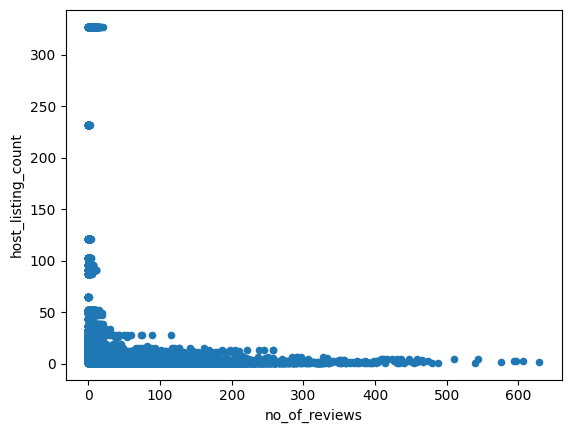

In [25]:
df1.plot(kind='scatter',x='no_of_reviews',y='host_listing_count',title='')

In [26]:
# df2=df1.copy()
df2=df2.drop_duplicates(subset=['listing_name'], keep='first')

In [27]:
df2['listing_name'].value_counts()

,count
listing_name,
"Sunlit and Cozy Williamsburg/Greenpoint, Brooklyn",1
Cozy/Simple Private Room#1 in Broadway AVE,1
√ LUXURY NYC LOFT √ | Spa Amenities | Smart Home,1
"Cozy Room Great Price in Bushwick, Bklyn!(Suite 3)",1
Local Paradise,1
...,...
Deluxe Apartment Fith Ave View #89,1
Modern Super Clean Midtown Apt in the Heart of NYC,1
Classic 3 Bedroom Upper West Side Apartment,1


In [28]:
df2.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'borough', 'area',
       'latitude', 'longitude', 'room_type', 'price (in dollars)',
       'minimum_stay', 'no_of_reviews', 'last_review_date',
       'reviews_per_month', 'host_listing_count', 'booking_availability'],
      dtype='object')

In [29]:
df2=df2.drop(columns=['last_review_date','reviews_per_month'],axis=1)

In [30]:
df2.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 47897 entries, 317 to 48894
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   listing_id            47897 non-null  int64  
 1   listing_name          47896 non-null  object 
 2   host_id               47897 non-null  int64  
 3   host_name             47876 non-null  object 
 4   borough               47897 non-null  object 
 5   area                  47897 non-null  object 
 6   latitude              47897 non-null  float64
 7   longitude             47897 non-null  float64
 8   room_type             47897 non-null  object 
 9   price (in dollars)    47897 non-null  int64  
 10  minimum_stay          47897 non-null  int64  
 11  no_of_reviews         47897 non-null  int64  
 12  host_listing_count    47897 non-null  int64  
 13  booking_availability  47897 non-null  int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 5.5+ MB


,listing_id,host_id,latitude,longitude,price (in dollars),minimum_stay,no_of_reviews,reviews_per_month,host_listing_count,booking_availability
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [31]:
df2['listing_name'].fillna(0, inplace=True)
df2['host_name'].fillna(0, inplace=True)
df2.isnull().sum()
# df=df1.copy()

,0
listing_id,0
listing_name,0
host_id,0
host_name,0
borough,0
area,0
latitude,0
longitude,0
room_type,0
price (in dollars),0


In [32]:
df2.columns


Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'borough', 'area',
       'latitude', 'longitude', 'room_type', 'price (in dollars)',
       'minimum_stay', 'no_of_reviews', 'host_listing_count',
       'booking_availability'],
      dtype='object')

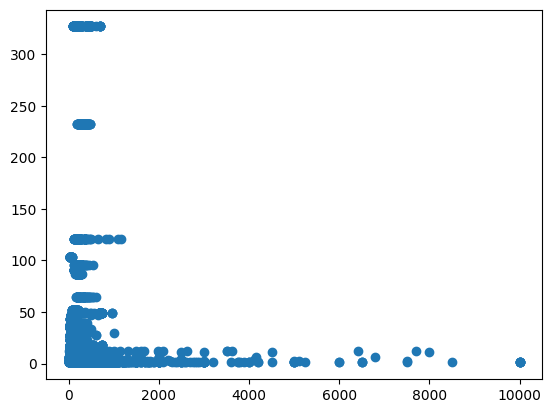

In [33]:
plt.scatter(x=df2['price (in dollars)'],y=df2['host_listing_count'])

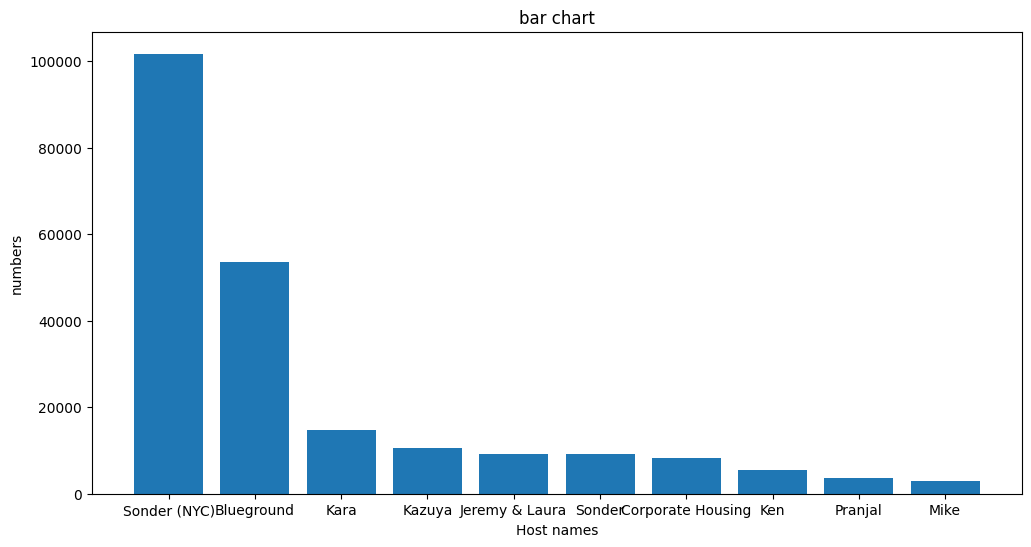

In [34]:

# Group by 'host_name' and count listings
host_counts = df2.groupby('host_name')['host_listing_count'].sum().sort_values(ascending=False)

# Select top N hosts (adjust N as needed)
top_n = 10
host_counts_top = host_counts.head(top_n)

plt.figure(figsize=(12, 6))
plt.bar(host_counts_top.index, host_counts_top.values)
plt.xlabel("Host names")
plt.ylabel("numbers")
plt.title("bar chart")
plt.show()

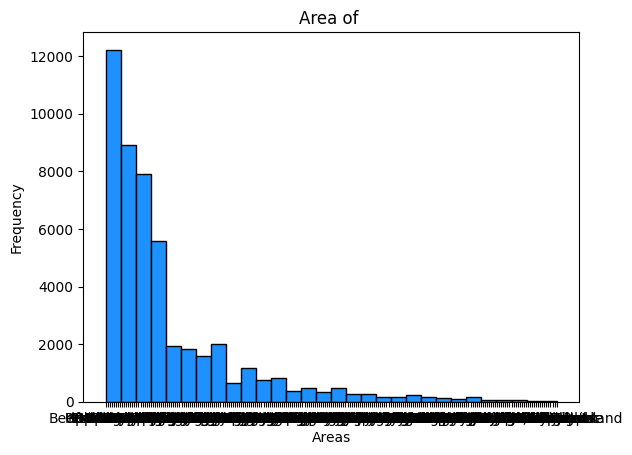

In [35]:
plt.hist(df['area'], bins=30, edgecolor='black', color='dodgerblue') # notice how we are binning data here
plt.title('Area of ')
plt.xlabel('Areas')
plt.ylabel('Frequency')
plt.show()

In [36]:

# # Group by 'host_name' and count listings
# host_counts = df2.groupby('host_name')['host_listing_count'].sum().sort_values(ascending=False)

# # Select top N hosts (adjust N as needed)
# top_n = 10
# host_counts_top = host_counts.head(top_n)

# plt.figure(figsize=(12, 6))
# plt.bar(host_counts_top.index, host_counts_top.values)
# plt.xlabel("Host names")
# plt.ylabel("numbers")
# plt.title("bar chart")
# plt.show()

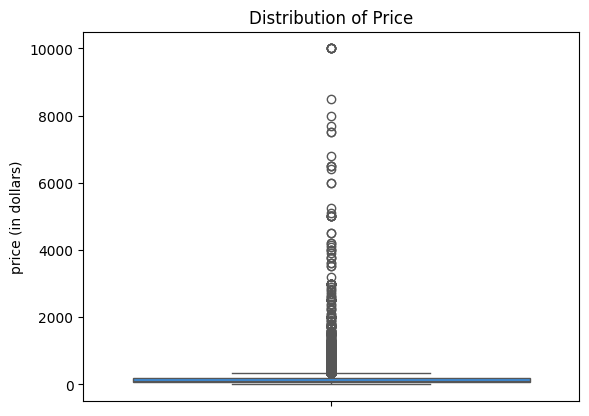

In [37]:
sns.boxplot(data=df2, y='price (in dollars)', color='dodgerblue').set(title='Distribution of Price')
plt.show()

In [38]:
sns.pairplot(df2)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [40]:
df2.columns

Index(['listing_id', 'listing_name', 'host_id', 'host_name', 'borough', 'area',
       'latitude', 'longitude', 'room_type', 'price (in dollars)',
       'minimum_stay', 'no_of_reviews', 'host_listing_count',
       'booking_availability'],
      dtype='object')

In [42]:
df2['area'].value_counts()

,count
area,
Williamsburg,3809
Bedford-Stuyvesant,3644
Harlem,2611
Bushwick,2420
Upper West Side,1939
...,...
Woodrow,1
Willowbrook,1
Rossville,1


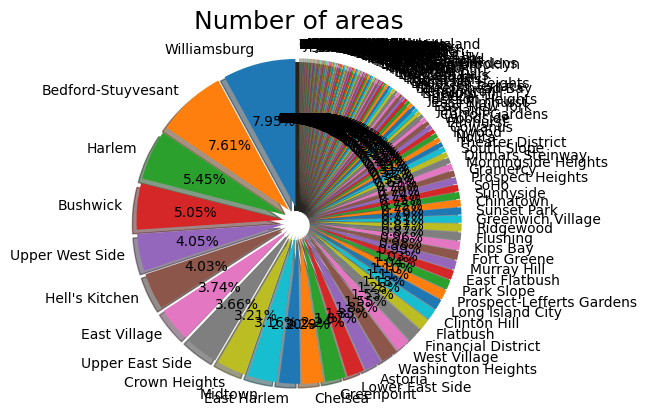

In [46]:
areas = df2['area'].value_counts()
plt.pie(areas.values, labels=areas.index, autopct='%0.2f%%', startangle=90, #I solved error using gemini
        explode=[0.1]*len(areas), shadow=True)
plt.title('Number of areas', {'fontsize': 18})
plt.show()

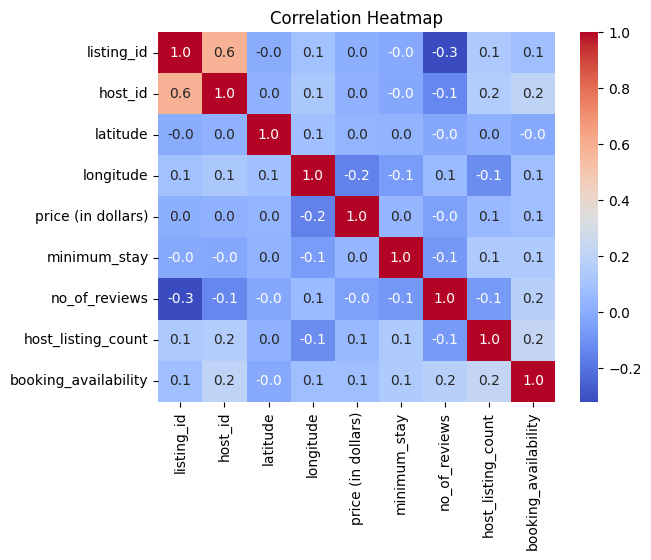

In [56]:
sns.heatmap(df2.corr(numeric_only=True), annot=True, fmt='.1f', cmap='coolwarm').set(title='Correlation Heatmap')
plt.show()

ValueError: Could not interpret value `Loan_Status` for `x`. An entry with this name does not appear in `data`.

<Figure size 1000x500 with 0 Axes>